# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue>Mission 4 : Modélisation du revenu des individus</font>

### 4.3.  ANOVA du logarithme du revenu basée sur le pays de l'individu

In [23]:
data = pd.read_csv("data_analyse02.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ln_child_income,country_code
0,6.591534,ALB
1,6.591534,ALB
2,6.591534,ALB
3,6.591534,ALB
4,6.591534,ALB


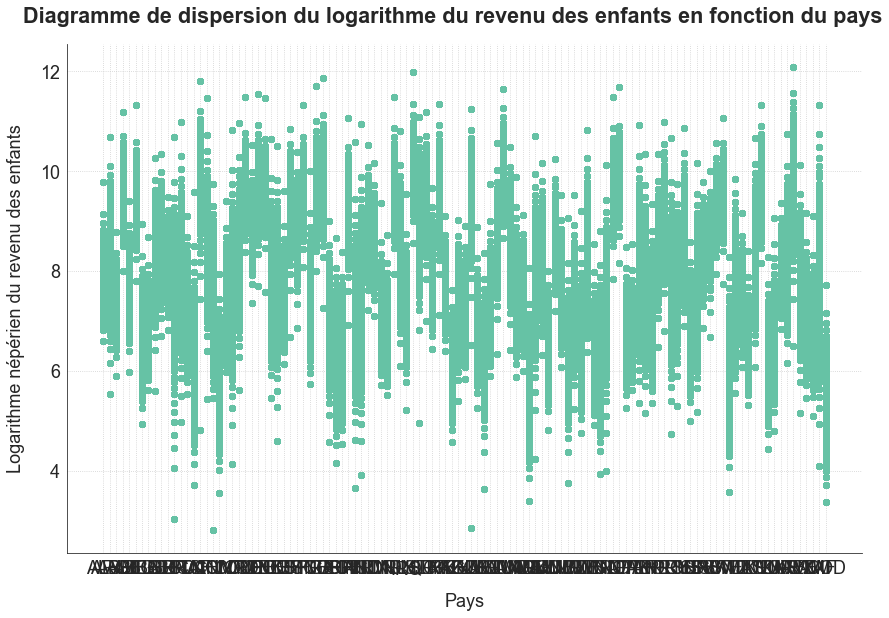

In [24]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays", is_mono=False)
mygraph.add_plot(data.country_code, data.ln_child_income, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
mygraph.set_axe('x', label="Pays")
mygraph.set_axe('y', label="Logarithme népérien du revenu des enfants")
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova02_00_diagramme_dispersion.png")
plt.show()

La dispersion des revenus des enfants par pays est bien plus homogène lorsque l'on considère le logarithme népérien du revenu des enfants. Même si l'on voit que les revenus sont plus élevés dans certains pays, la dispersion est bien moindre grâce à l'emploi du logarithme.

In [5]:
anova = smf.ols(formula="ln_child_income ~ country_code", data=data).fit()

In [6]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_child_income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.355e+05
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:19:06   Log-Likelihood:            -6.1573e+06
No. Observations:             5642420   AIC:                         1.231e+07
Df Residuals:                 5642307   BIC:                         1.232e+07
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.8515      0.003   2432.593      0.000       7.845       7.858
country_code[T.ARG]     0.4515      0.005     98.867      0.000       0.443       0.460
country_code[T.ARM]    -0.5697      0.005   -124.892      0.000      -0.579      -0.561
country_code[T.AUT]     1.7380      0.005    380.970      0.000       1.729       1.747
country_code[T.AZE]    -0.2470      0.005    -54.157      0.000      -0.256      -0.238
country_code[T.BEL]     1.6258      0.005    356.455      0.000       1.617       1.635
country_code[T.BFA]    -1.2915      0.005   -282.928      0.000      -1.300      -1.283
country_code[T.BGD]    -1.1078      0.005   -242.820      0.000      -1.117      -1.099
country_code[T.BGR]     0.4229      0.005     92.672      0.000       0.414       0.432
country_code[T.BIH]     0.6881      0.005    150.717      0.000       0.679       0.697
country_code[T.BLR]     0.3056      0.005     66.993      0.000       0.297       0.315
country_code[T.BOL]    -0.4920      0.005   -107.790      0.000      -0.501      -0.483
country_code[T.BRA]     0.0778      0.005     17.052      0.000       0.069       0.087
country_code[T.BTN]    -0.7666      0.005   -168.034      0.000      -0.776      -0.758
country_code[T.CAF]    -1.7211      0.005   -377.244      0.000      -1.730      -1.712
country_code[T.CAN]     1.9629      0.005    430.431      0.000       1.954       1.972
country_code[T.CHL]     0.5101      0.005    111.816      0.000       0.501       0.519
country_code[T.CHN]    -0.4534      0.005    -99.396      0.000      -0.462      -0.445
country_code[T.CIV]    -2.1574      0.005   -472.933      0.000      -2.166      -2.148
country_code[T.CMR]    -0.6059      0.005   -132.774      0.000      -0.615      -0.597
country_code[T.COD]    -2.5638      0.005   -561.709      0.000      -2.573      -2.555
country_code[T.COL]    -0.2945      0.005    -64.500      0.000      -0.303      -0.286
country_code[T.CRI]     0.3489      0.005     76.419      0.000       0.340       0.358
country_code[T.CYP]     1.7784      0.005    389.937      0.000       1.769       1.787
country_code[T.CZE]     1.0546      0.005    231.165      0.000       1.046       1.064
country_code[T.DEU]     1.7884      0.005    392.090      0.000       1.779       1.797
country_code[T.DNK]     1.7708      0.005    388.326      0.000       1.762       1.780
country_code[T.DOM]    -0.1184      0.005    -25.932      0.000      -0.127      -0.109
country_code[T.ECU]    -0.2008      0.005    -43.978      0.000      -0.210      -0.192
country_code[T.EGY]    -0.4477      0.005    -98.063      0.000      -0.457      -0.439
country_code[T.ESP]     1.4575      0.005    319.500      0.000       1.449       1.466
country_code[T.EST]     0.9433      0.005    206.780      0.000       0.934       0.952
cou

In [7]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
country_code,7.881920e+06,112.0,135530.800483,0.0,0.729019,0.728999
Residual,2.929765e+06,5642307.0,NaN,NaN,NaN,NaN
total,1.081168e+07,5642419.0,NaN,NaN,NaN,NaN


Le remplacement du revenu de l'enfant par son logarithme permet une nette amélioration du modèle. La part de dispersion expliquée par le modèle (R²) augmente à 72,9%. La variable country_code est considérée comme significative par l'ANOVA.  
La meilleure qualité du modèle se traduit par une diminution des indicateurs AIC et BIC de 1.155e+08 à 1.231e+07.  
  
Avant d'analyser le modèle, il faut vérifier le respect des hypothèses sur la normalité des résidus, la linéarité de la relation et l'homoscédasticité.

### Vérification des hypothèses

**Hypothèse 1 : Normalité des résidus**

In [8]:
alpha_normalite = 0.05
ad_stat, ad_pvalue = sm.stats.normal_ad(anova.resid)
norm_stat, norm_pvalue = st.kstest(anova.resid, cdf='norm', args=(anova.resid.mean(), anova.resid.var(ddof=1)))
jb_stat, jb_pvalue, skw, kurt = sm.stats.stattools.jarque_bera(anova.resid)
df_normalite = pd.DataFrame({'H0':np.repeat("Distribution normale",3), 'Statistique':["{:.2f}".format(ad_stat),"{:.2f}".format(norm_stat),"{:.2f}".format(jb_stat)], \
                             'p-value':["{:.3f}".format(ad_pvalue),"{:.3f}".format(norm_pvalue),"{:.3f}".format(jb_pvalue)]}, index=["Anderson-Darling","Kolmogorov-Smirnov","Jarque-Bera"])
inter_col = "Résultat (seuil={:.1%})".format(alpha_normalite)
df_normalite[inter_col] = ["Normalité acceptée" if float(pval)>=alpha_normalite else "Normalité rejetée" for pval in df_normalite["p-value"]]
df_normalite

C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


,H0,Statistique,p-value,Résultat (seuil=5.0%)
Anderson-Darling,Distribution normale,19523.01,0.000,Normalité rejetée
Kolmogorov-Smirnov,Distribution normale,0.05,0.000,Normalité rejetée
Jarque-Bera,Distribution normale,1689351.21,0.000,Normalité rejetée


Aucun des trois test n'accepte la normalité. Nous avons un grand nombre d'observations. Une symétrie de la distribution des résidus sera suffisante. Je vérifie graphiquement cette symétrie, et je trace également la droite de Henry.

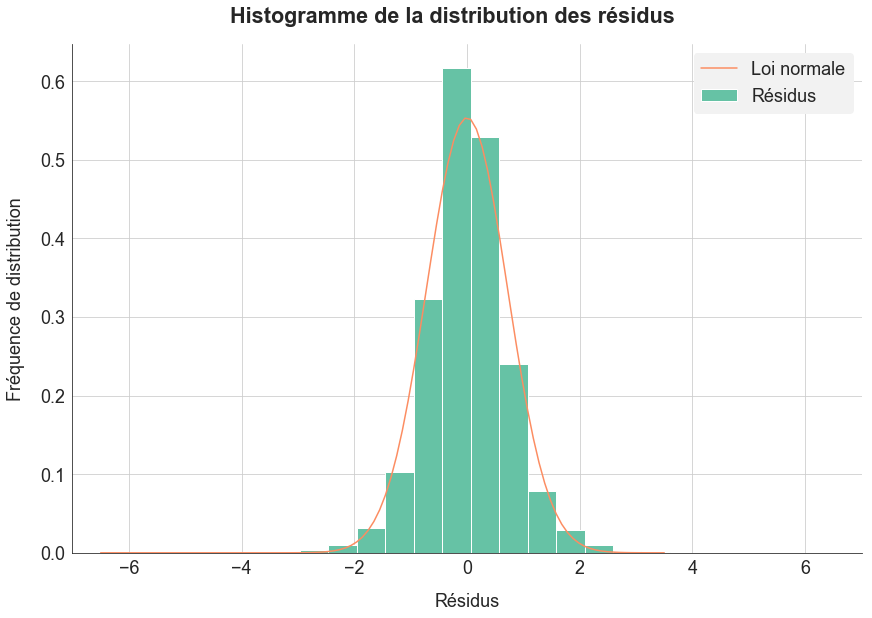

In [9]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova02_01_distribution_residus.png")
plt.show()

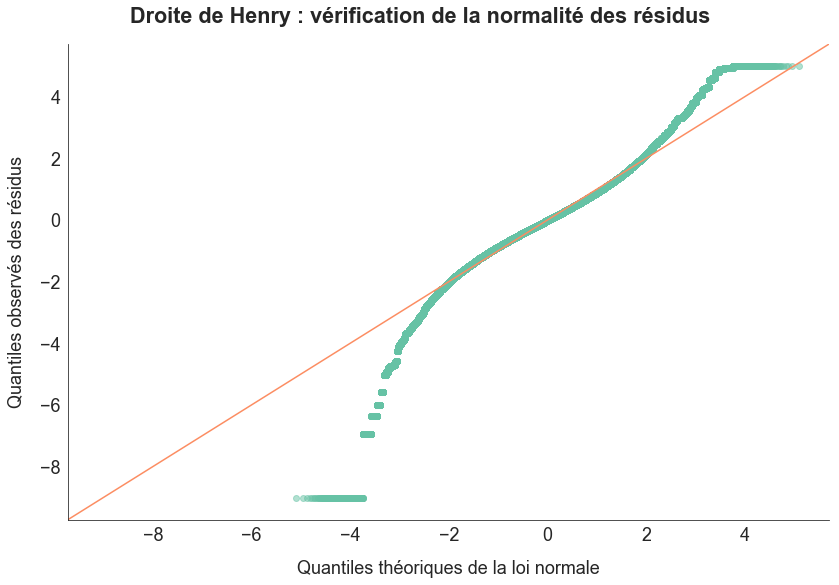

In [10]:
mygraph = sfg.MyGraph("Droite de Henry : vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova02_02_droite_henry.png")
plt.show()

On remarque que les résidus ne sont pas normaux. Par contre, ils sont désormais à peu près symétriques. Vu le grand nombre de données, cette symétrie des résidus suffit pour que les tests soient asymptotatiquement significatifs.

**Hypothèse 2 : Linéarité et additivité de la relation  
Hypothèse 3 : Homoscédasticité des résidus**

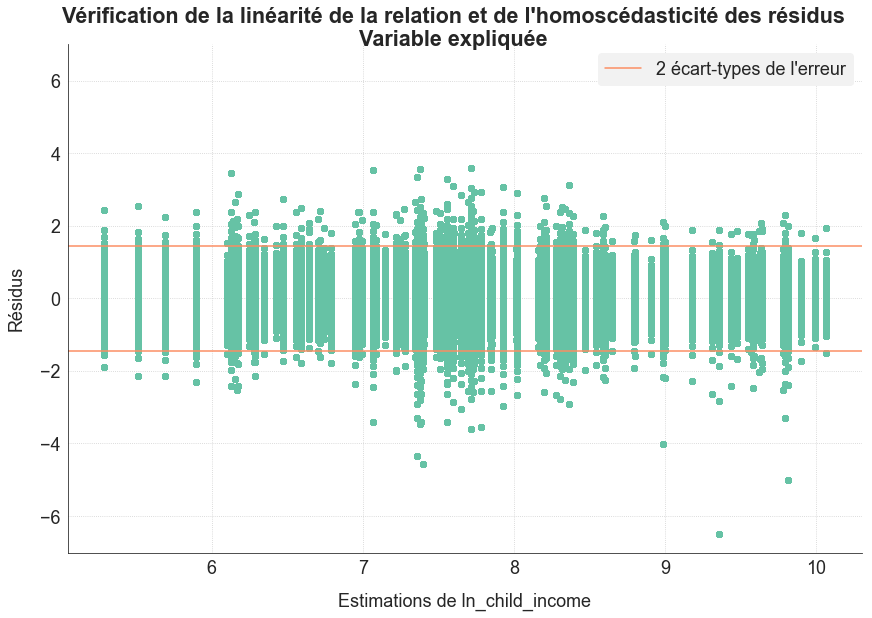

In [11]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimations de ln_child_income")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova02_03_linearite_homoscedasticite_endo.png")
plt.show()

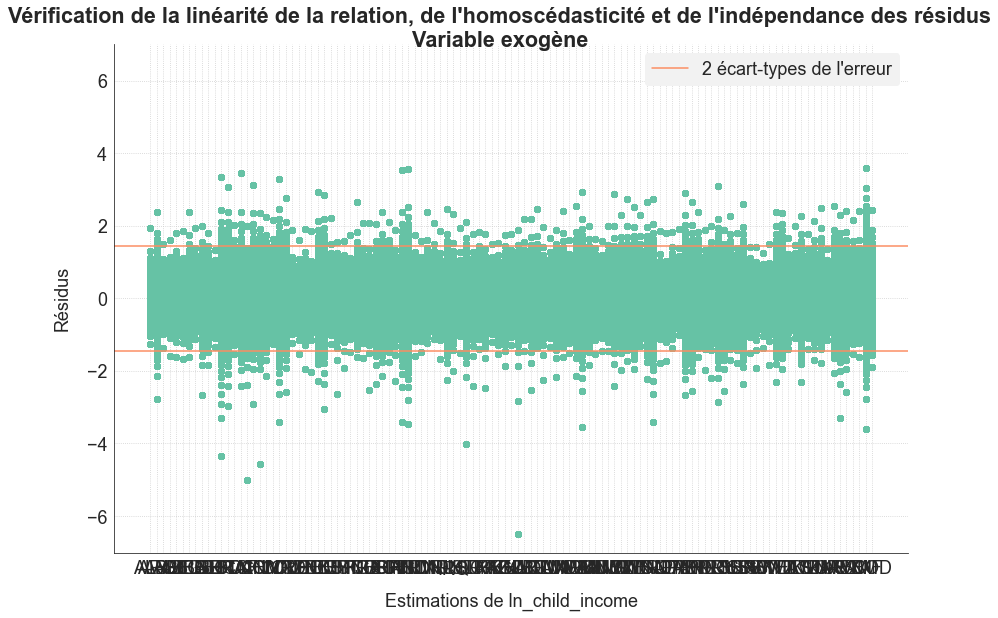

In [12]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariable exogène", is_mono=False)
mygraph.add_plot(data.country_code, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Pays")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova02_04_linearite_homoscedasticite_exo.png")
plt.show()

In [13]:
alpha_homo = 0.05
lm_stat, lm_pvalue, f_stat, f_pvalue = sm.stats.diagnostic.het_breuschpagan(anova.resid, anova.model.exog)
if f_pvalue >= alpha_homo:
    test_result = ["Homoscédasticité acceptée"]
else:
    test_result = ["Homoscédasticité rejetée"]
pd.DataFrame({'H0':["Variance des résidus constante"], 'Statistique':["{:.2f}".format(f_stat)], \
             'p-value':["{:.3f}".format(f_pvalue)], 'Résultat (seuil={:.1%})'.format(alpha_homo):test_result}, index=["Breusch Pagan"])

,H0,Statistique,p-value,Résultat (seuil=5.0%)
Breusch Pagan,Variance des résidus constante,3649.46,0.000,Homoscédasticité rejetée


L'homoscédasticité est rejetée par le test. Par contre, les graphiques montrent que les résidus sont désormais assez bien répartis dans les valeurs positives et négatives. Les graphiques sont satisfaisants et permettent de valider les hypothèses d'homoscédasticité des résidus et de linéarité de la relation.

**Conclusion sur les hypothèses**

Les graphiques permettent d'accepter les 3 hypothèses et de pousser plus avant l'analyse du modèle.

**Vérification supplémentaire : absence de colinéarité entre les exogènes**

Avec une seule variable explicative, pas de problème de colinéarité.

**Vérification de la pertinence des estimations par rapport aux valeurs réelles**

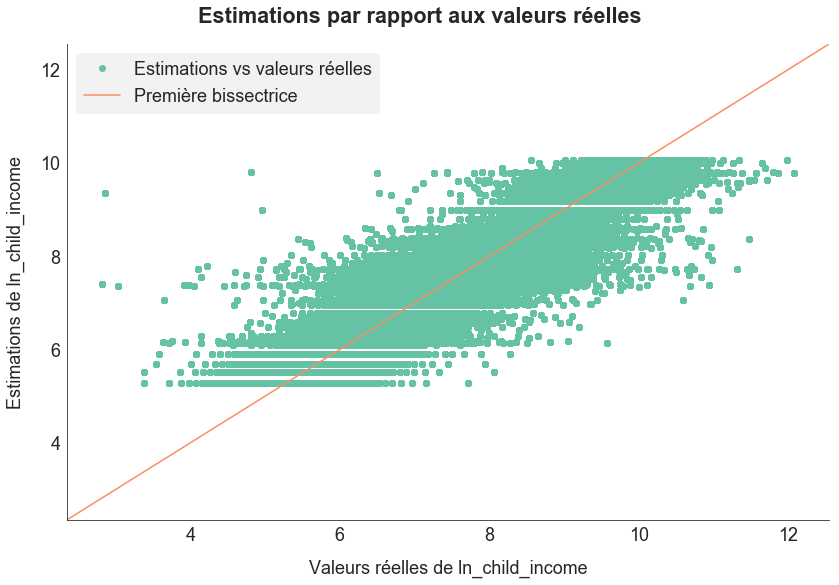

In [14]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data.ln_child_income, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de ln_child_income")
mygraph.set_axe('x', label="Valeurs réelles de ln_child_income")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova02_05_accuracy_graph.png")
plt.show()

Comme les analyses précédentes le supposent, les valeurs élevées de child income sont mieux évaluées par ce modèle (par rapport au modèle 1). Par contre, les estimations restent très dispersées par rapport à la première bissectrice : elles sont peu précises. Nous devons chercher un meilleur modèle.

**Analyse des outliers**

In [15]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [20]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

,0
levier,0.00004005
cook,0.00000071


In [16]:
only_both = False
if only_both == False:
    print("Résumé des observations atypiques OU influentes")
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print(variables_speciales)
    print("")
print("Résumé des observations atypiques ET influentes")
variables_investigation = analyses[analyses.outlier & analyses.influence]
variables_investigation

Résumé des observations atypiques OU influentes
         observation_name   levier  outlier  cook_distance  influence
49349               49349  0.00002    False       0.000001       True
49350               49350  0.00002    False       0.000001       True
49351               49351  0.00002    False       0.000001       True
49352               49352  0.00002    False       0.000001       True
49353               49353  0.00002    False       0.000001       True
49354               49354  0.00002    False       0.000001       True
49355               49355  0.00002    False       0.000001       True
49356               49356  0.00002    False       0.000001       True
49357               49357  0.00002    False       0.000001       True
49358               49358  0.00002    False       0.000001       True
49359               49359  0.00002    False       0.000001       True
49360               49360  0.00002    False       0.000001       True
49361               49361  0.00002    Fals

,observation_name,levier,outlier,cook_distance,influence


Il y a 294 702 obervations influentes, soit 5,22% des individus. Le nombre de valeurs influentes est en net augmentation par rapport au premier mdoèle. Mais aucune observation n'est à la fois atypique et influente. Nous pouvons donc conserver l'ensemble des observations.

**Conclusion sur ce modèle**

L'opération de feature engineering consistant à remplacer le revenu des enfants par le logarithme du revenu des enfants (logarithme népérien) améliore le modèle. Les hypothèses sont mieux respectées et les résultats de la modélisation meilleure.  
Toutefois, ce modèle est complexe, avec un coefficient différent pour chaque pays. Une idée pour simplifier le modèle est de caractériser un pays par son revenu moyen et son indice de Gini au lieu d'utiliser son nom ou son code pays. Ainsi, nous limitons le nombre de coefficients estimés à 2 (en ne comptant pas la constante) et les pays avec des caractéristiques similaires auront des résultats similaires.